#### **1. Загрузите файл `HR.csv` в pandas dataframe**

In [1]:
import pandas as pd

df_hr = pd.read_csv('HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### **2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**


In [20]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Среднее отклонение:

In [21]:
df_hr.mad()

satisfaction_level        0.206911
last_evaluation           0.150389
number_project            1.008344
average_montly_hours     43.671320
time_spend_company        1.076123
Work_accident             0.247395
left                      0.362798
promotion_last_5years     0.041632
dtype: float64

Мода:

In [22]:
df_hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#### **3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.**

In [2]:
filtered = df_hr[["satisfaction_level",
                  "last_evaluation",
                  "number_project",
                  "average_montly_hours",
                  "time_spend_company",
                  "Work_accident",
                  "left",
                  "promotion_last_5years"
                ]]
corr = filtered.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


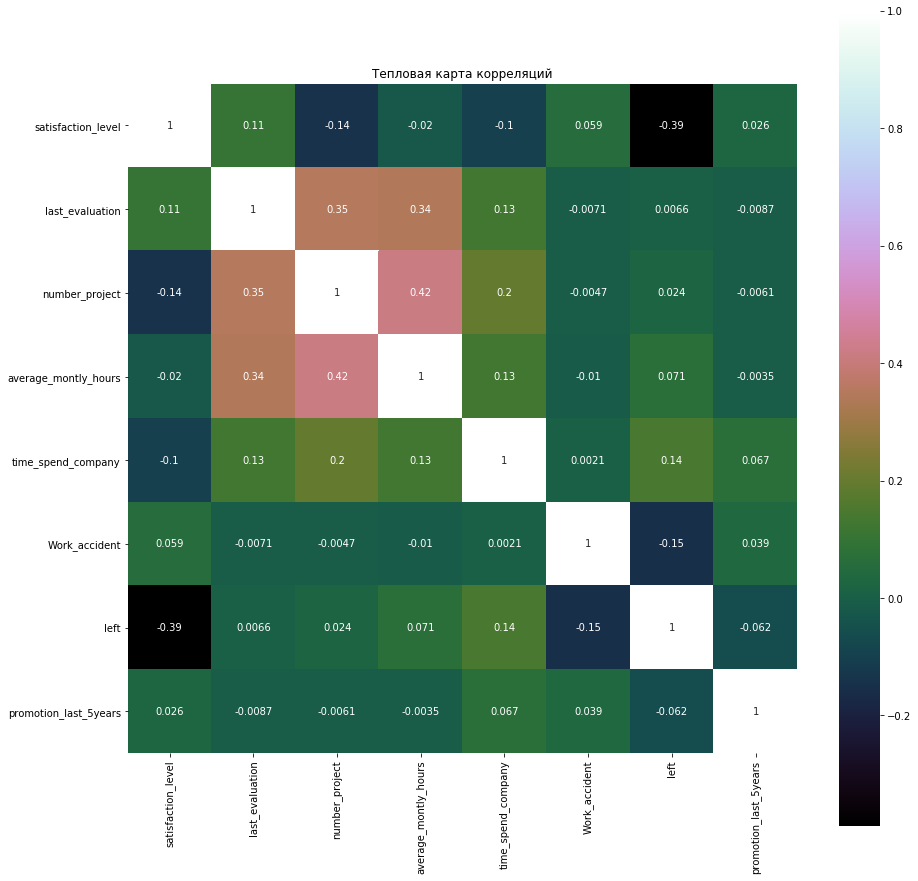

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
#%matplotlib inline;

plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Тепловая карта корреляций')
plt.show()

самые скоррелированные переменные:
* **average_montly_hours**  и **number_project** -
* **number_project** и **last_evaluation**

наименее скоррелированные переменные:
* **left** и **satisfaction_level**
* **Work_accident** и **left**


#### **4. Рассчитайте сколько сотрудников работает в каждом департаменте**

In [66]:
df_hr_empl = df_hr.pivot_table(index = 'department', values = 'satisfaction_level', aggfunc = 'count').head()
df_hr_empl.rename(columns= {'satisfaction_level': 'employees_num'}, inplace = True)
nn = df_hr_empl.reset_index()
nn

,department,employees_num
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


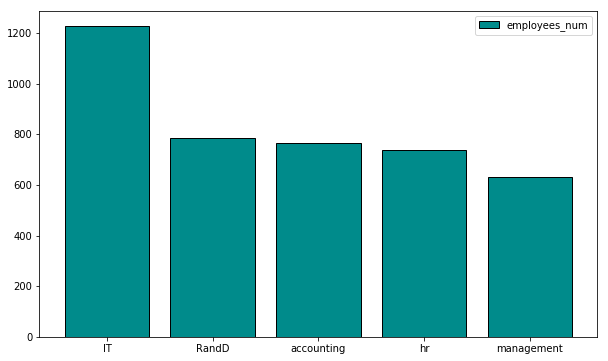

In [90]:
fig, ax = plt.subplots()
ax.bar(nn.index.tolist(), df_hr_empl['employees_num'], color = 'darkcyan', edgecolor = 'black')
ax.set_xticklabels(['', 'IT', 'RandD', 'accounting', 'hr', 'management'])
fig.set_figwidth(10)
fig.set_figheight(6)
plt.legend(df_hr_empl, loc=1)
plt.show()

Наибольшее число сотрудников работает в IT департаменте, наименьшее - в департаменте менеджмента. Исходя из этого, делаем предположение, что организация занимается IT разработкой.

#### **5. Показать распределение сотрудников по зарплатам**

   salary  employees_num      share
0    high           1237   8.247216
1     low           7316  48.776585
2  medium           6446  42.976198


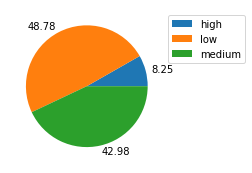

In [139]:
df_hr_sal = df_hr.pivot_table(index = 'salary', values = 'satisfaction_level', aggfunc = 'count').head()
df_hr_sal.rename(columns = {'satisfaction_level': 'employees_num'}, inplace=True)
df_hr_sal

#-----поиск доли -----------------

total = df_hr_sal['employees_num'].sum()
def find_share(df_hr_sal):     
    share = df_hr_sal['employees_num']/total*100
    return share

df_hr_sal['share'] = df_hr_sal.apply(find_share, axis=1)  
df_hr_sal = df_hr_sal.reset_index()
print(df_hr_sal)

#-----график---------------------------
df_hr_sal['share'] = round(df_hr_sal['share'], 2)
plt.subplot(1, 2, 1)
plt.pie(df_hr_sal['share'], labels=df_hr_sal['share'])
plt.legend(df_hr_sal['salary'], bbox_to_anchor=(1, 1))
plt.show()

8% сотрудников имеет высокую зарплату. Соотношение сотрудников с низкой и средней зарплатой примерно одинаковое (48.78% и 42.98% соответственно).
Кол-во сотрудников с низкой зарплатой на 5.8% больше чем кол-во сотрудников со средней зарплатой.

#### **6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [141]:
df_hr_sal_dep = df_hr.pivot_table(index = 'salary', columns = 'department', values = 'satisfaction_level', aggfunc = 'count').head()
df_hr_sal_dep.rename(columns = {'satisfaction_level': 'employees_num'}, inplace=True)
df_hr_sal_dep

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [165]:
df_hr_sal_dep.loc["high"].to_list()

[83, 51, 74, 45, 225, 80, 68, 269, 141, 201]

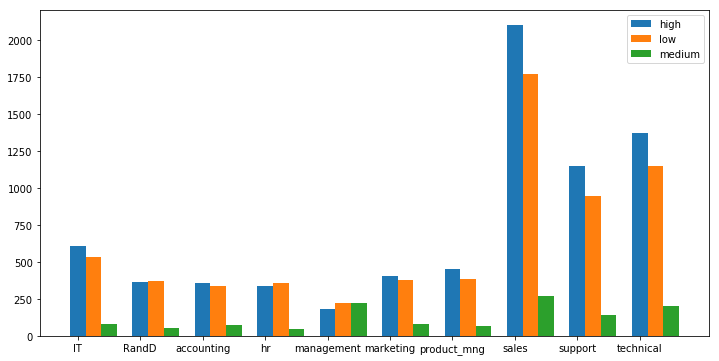

In [200]:
fig, ax = plt.subplots()
x = list(range(0, 10))
ax.bar(
    x,
    df_hr_sal_dep.loc["low"].to_list(),
    width=1/4
)
ax.bar(
    list(map(lambda i: i+1/4, x)), 
    df_hr_sal_dep.loc["medium"].to_list(),
    width=1/4
)
ax.bar(
    list(map(lambda i: i+2/4, x)),
    df_hr_sal_dep.loc["high"].to_list(),
    width=1/4
)
ax.set_xticklabels(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support','technical'])
plt.xticks(x)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.legend(df_hr_sal_dep.index.to_list(), bbox_to_anchor=(1, 1))
plt.show()

#### **7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [153]:
df_hr_hour = df_hr.pivot_table(index = 'salary',  values = 'average_montly_hours', aggfunc = 'mean').head()
print(df_hr_hour)

max_sal_hour = df_hr_hour.loc[df_hr_hour.average_montly_hours == max(df_hr_hour['average_montly_hours'])]
max_sal_hour

        average_montly_hours
salary                      
high              199.867421
low               200.996583
medium            201.338349


,average_montly_hours
salary,
medium,201.338349


Работники со средним окладом проводят на работе больше времени, соответственно, гипотеза не верна.

#### **8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [172]:
#------------Доля сотрудников с повышением за последние 5 лет-------------------
out = df_hr[df_hr.left==1]
out_and_promo = out[out.promotion_last_5years==1].count()['left'] / out.count()['left']
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников: ','{0:.3}%'.format(out_and_promo))
      
stay = df_hr[df_hr.left==0]
stay_and_promo = stay[stay.promotion_last_5years==1].count()['left'] / stay.count()['left']
print('Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников: ','{0:.3}%'.format(stay_and_promo),'\n')

#-------------Средняя степень удовлетворенности------------------------------------
df_hr_stf = df_hr.pivot_table(index = 'left',  values = 'satisfaction_level', aggfunc = 'mean', fill_value = 0).head()
df_hr_stf.rename(columns={'satisfaction_level': 'avg_satisfaction_level'}, inplace=True)
print(df_hr_stf)

#-------------Средняя степень удовлетворенности------------------------------------
df_hr_prog = df_hr.pivot_table(index = 'left',  values = 'number_project', aggfunc = 'mean', fill_value = 0).head()
df_hr_prog.rename(columns={'number_project': 'avg_number_project'}, inplace=True)
print(df_hr_prog)

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников:  0.00532%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников:  0.0263% 

      avg_satisfaction_level
left                        
0                   0.666810
1                   0.440098
      avg_number_project
left                    
0               3.786664
1               3.855503


Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников выше. При этом среднее количество проектов выполняемое уволившимися и не уволившимися сотрудниками примерно одинаковое (3.8 и 3.9). То есть при одинаковом объеме работы, у уволившихся сотрудников не было повышений, что отразилось на средней степени удовлетворенности работой (0.440098 против 0.666810) и привело к дальнейшим увольнениям. 